1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



[22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


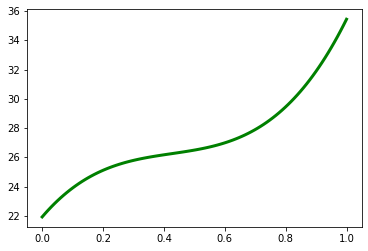

Maximum wind will be: 34.63345579700954


In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from pandas import DataFrame
import pandas as pd
import scipy
import scipy.stats as stats
from matplotlib import pyplot as plt

max_speeds = np.load('max-speeds.npy')
N = max_speeds.shape[0]

max_speeds = np.sort(max_speeds)

p = []
for i in range (0,N): 
    p.append(i/(N+1))
p = np.array(p)

print(max_speeds)

spl = UnivariateSpline(p, max_speeds)
xs = np.linspace(0, 1, 100)
plt.plot(xs, spl(xs), 'g', lw=3)
plt.show()

fifty_prob = 1. - 0.02

print("Maximum wind will be:", spl(fifty_prob))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [2]:
#period fixed to be 12 months
omega = 2.*np.pi/12.

def f(x, p0, p1, p2):
    return p0 + p1*np.sin(omega*x+p2)

parameters max temp.: [26.75       10.93254951 -1.94960959]
parameters min temp.: [-39.66666667  25.58169521  -2.17609562]


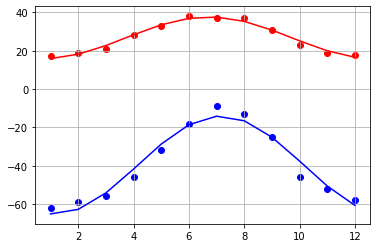

The fit with a simple sine function seems resonable, even if it's not perfect.
Fixing sine's period leads to worse fit, but it is more logical assumption than let it free.
Maybe also a gaussian fit could be used, but I'm not sure about it's physical meaning

The two offset are (in months): 8.27651995125345 and 7.843963514577219
Within the fit accuracy they are not so different, also looking to the graph


In [3]:
N=12
vmax = (17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18)
vmin = (-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58)
x = np.linspace(1,12,12)

vmax = np.array(vmax)
vmin = np.array(vmin)


plt.scatter(x, vmax , color='r')
plt.scatter(x, vmin , color='b')
plt.grid()

params1, params_covariance = scipy.optimize.curve_fit(f, x, vmax , p0=[30, 10,-2])
print("parameters max temp.:",params1)
plt.plot(x, f(x, params1[0], params1[1], params1[2]),
         label='Fitted function', color="r")

params2, params_covariance = scipy.optimize.curve_fit(f, x, vmin , p0=[-30, 25,-2])
print("parameters min temp.:",params2)
plt.plot(x, f(x, params2[0], params2[1], params2[2]),
         label='Fitted function', color="b")

plt.show()
print("The fit with a simple sine function seems resonable, even if it's not perfect.")
print("Fixing sine's period leads to worse fit, but it is more logical assumption than let it free.")
print("Maybe also a gaussian fit could be used, but I'm not sure about it's physical meaning")

#time offset converted in months
time1 = 12+params1[2]/omega
time2 = 12+params2[2]/omega
print()
print("The two offset are (in months):", time1, "and", time2)
print("Within the fit accuracy they are not so different, also looking to the graph")

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [4]:
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

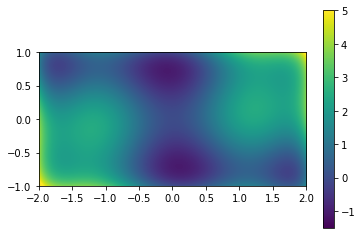

Text(0.5, 0.92, 'Six-hump Camelback function')

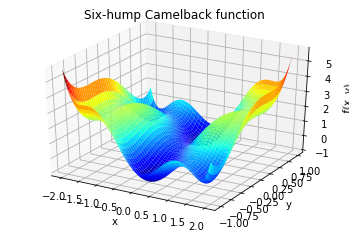

In [5]:
import matplotlib.cm as cm
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy import optimize 
from mpl_toolkits.mplot3d import Axes3D


x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)
xg, yg = np.meshgrid(x, y)
z = f([xg,yg])
#h = plt.contourf(x,y,z)

fig, ax = plt.subplots()
im = ax.imshow(z, extent=[-2, 2, -1, 1], vmax=5, vmin=-1.5, origin="lower")
fig.colorbar(im)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]),
                       cmap=plt.cm.jet, linewidth=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

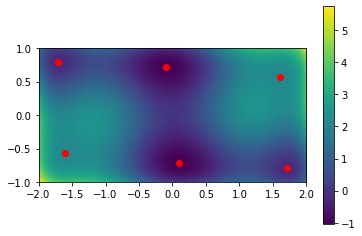

All minima, with local and maximal:
x = -0.08984201929202379   y = 0.7126563006498517    f = -1.0316284534897908
x = 0.08984201957104768   y = -0.7126563012285732    f = -1.0316284534897917
x = -1.7036066905393423   y = 0.796083569180665    f = -0.2154638243837136
x = 1.7036066905393423   y = -0.796083569180665    f = -0.2154638243837136
x = 1.6071047802705958   y = 0.5686514829299164    f = 2.104250310311266
x = -1.6071047802705958   y = -0.5686514829299164    f = 2.104250310311266
(0,0) is a 'punto di sella'


In [6]:
from scipy import optimize

X = [[0,1], [0,-1], [-3,1], [3,-1], [3,3], [-3,-3]]

x_mins = []
y_mins = []

for x0 in X:
    x_min = optimize.minimize(f, x0)
    x_mins.append(x_min.x[0])
    y_mins.append(x_min.x[1])

plt.figure()


plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar()

plt.scatter(x_mins,y_mins, color="r")

plt.show()

print("All minima, with local and maximal:")

for i in range(0,len(X)):
    print("x =", x_mins[i], "  y =", y_mins[i], "   f =", f([x_mins[i],y_mins[i]]))
    
print("(0,0) is a 'punto di sella'")

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

<function matplotlib.pyplot.show(*args, **kw)>

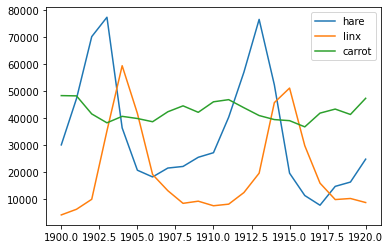

In [7]:
from scipy import fftpack
from matplotlib import pyplot as plt

data = np.loadtxt("populations.txt", dtype=np.float32)
data = np.transpose(data)

year = data[0]
hare = data[1]
lynx = data[2]
carrot = data[3]

print() 
plt.plot(year, hare, label='hare');
plt.plot(year, lynx, label='linx');
plt.plot(year, carrot, label='carrot');
plt.legend()
plt.show


hare periodicity: 10.5 years
linx periodicity: 10.5 years
carrot periodicity: 10.5 years


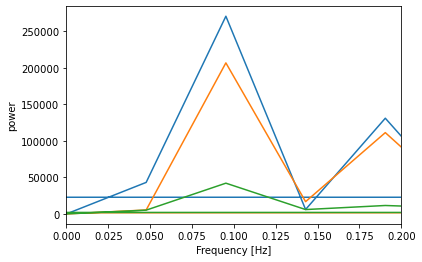

In [8]:
periods = []

for i in range(1,len(data),1):
    v = data[i] - data[i].mean()
    h_fft = fftpack.fft(v)
    size = len(v)
    power = np.abs(h_fft)
    sample_freq = fftpack.fftfreq(size)
    
    periods.append(1./sample_freq[np.argmax(power)])
    
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('power')
    plt.xlim(0,0.2)
    
plt.show

print("hare periodicity:", periods[0],"years")
print("linx periodicity:", periods[1],"years")
print("carrot periodicity:", periods[2],"years")

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

Image


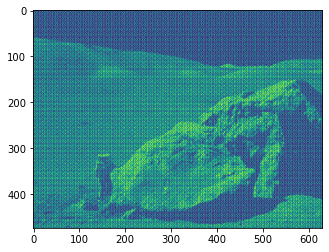

Image FFT with logaritmich scale


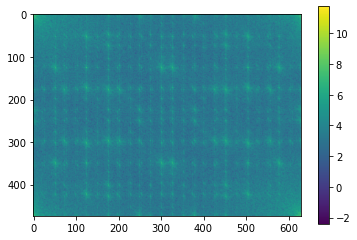

New Image with first model


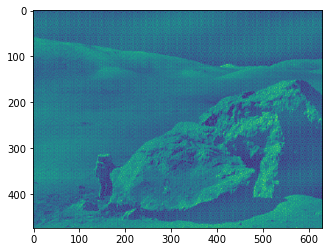

New Image with second model


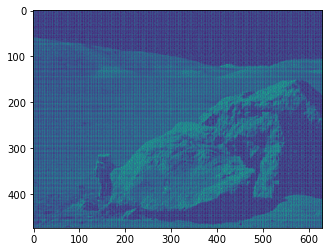

In [181]:
from scipy import fftpack

image = plt.imread("moonlanding.png")

print("Image")
fig, ax = plt.subplots()
ax.imshow(image)
plt.show()

fig, bx = plt.subplots()
x = fftpack.fft2(image)
x2 = fftpack.fft2(image)
abs_x = np.abs(x)
abs_x2 = np.abs(x2)

im = bx.imshow(np.log(abs_x))

print("Image FFT with logaritmich scale")

fig.colorbar(im)
plt.show()


a = len(x)
b = len (x[1])

for i in range(0,a):
    for j in range(0,b):
        if (np.log(abs_x[i][j])>7.9 and np.log(abs_x[i][j])<11.2): x[i][j]=0
        
        
image = fftpack.ifft2(x)

print("New Image with first model")

fig, dx = plt.subplots()
dx.imshow(np.abs(image))
plt.show()


print("New Image with second model")

Ny = 15
Nx = 35

#for i in range(0,a):
#    for j in range(0,b):
#        if (i<Nx and j<Ny): x[i][j]=0
#        if (i>a-Nx and j<Ny): x[i][j]=0
#        if (i>a-Nx and j>b-Ny): x[i][j]=0
#        if (i<Nx and j>b-Ny): x[i][j]=0

for i in range(Nx,a-Nx):
    for j in range(Ny,b-Ny):
        if (np.log(abs_x2[i][j])>7): x2[i][j]=0
          
image = fftpack.ifft2(x2)

fig, fx = plt.subplots()
fx.imshow(np.abs(image))
plt.show()